In [5]:
import arviz as az
from tms_risk.utils import get_all_behavior
from tms_risk.cogmodels.evidence_model import EvidenceModel, EvidenceModelTwoPriors, EvidenceModelGauss, EvidenceModelTwoPriorsDiminishingUtility, EvidenceModelDiminishingUtility
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
traces = {}

for model in list(range(1, 9)) + ['8']:
    traces[f'model {model}'] = az.from_netcdf(f'/data/ds-tmsrisk/derivatives/cogmodels/model-{model}_trace.netcdf')

In [14]:
comparison = az.compare(traces)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/

In [15]:
labels = {'model 1':'2 evidence sds',
'model 2':'2 evidence sds + different priors',
'model 3':'2 evidence sds (Gauss)',
'model 4':'2 evidence sds + diminishing utility',
'model 5':'2 evidence sds + different priors + diminishing utility',
'model 6':'4 evidence sds',
'model 7':'4 evidence sds + different priors',
'model 8':'Khaw et al.'}

In [16]:
comparison.index = comparison.index.map(labels)

In [17]:
comparison


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
2 evidence sds + different priors + diminishing utility,0,-4096.516607,211.388177,0.000000,8.956370e-01,42.389341,0.000000,True,log
2 evidence sds + different priors,1,-4123.736660,189.903176,27.220052,2.630632e-07,41.604079,5.684679,True,log
4 evidence sds,2,-4297.006032,295.203924,200.489425,8.022648e-02,43.104983,23.316651,True,log
4 evidence sds + different priors,3,-4301.882322,192.056967,205.365715,2.074134e-07,41.431922,21.464872,True,log
2 evidence sds + diminishing utility,4,-4449.508677,178.878228,352.992069,2.413686e-02,38.108972,26.315547,False,log
2 evidence sds,5,-4613.363922,147.301358,516.847315,6.933926e-08,35.155726,29.644630,False,log
Khaw et al.,6,-4677.444731,87.337885,580.928124,5.346104e-08,33.715886,30.778089,False,log
2 evidence sds (Gauss),7,-4819.729985,193.550228,723.213378,0.000000e+00,32.287580,33.513852,True,log


<AxesSubplot: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

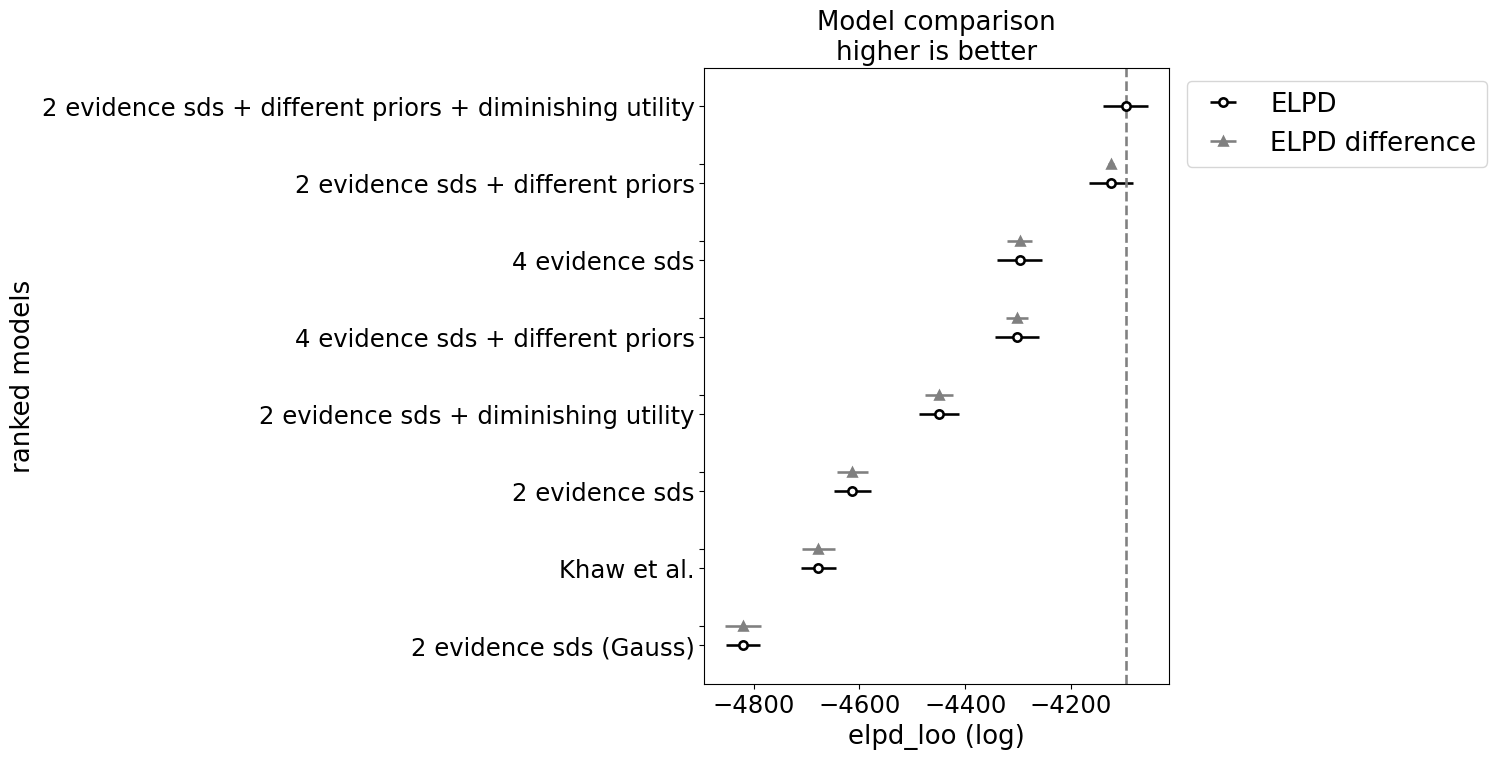

In [18]:
az.plot_compare(comparison)